Antes de arrancar... guardemos los datos!

https://github.com/ricardoahumada/Python_for_Data_Science/raw/master/data/2008.zip

¡El dataset es muy grande! Pero por suerte podemos cargarlo directamente desde el .zip

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_comp = pd.read_csv("../data/2008.zip",nrows=10000)
df_comp.head()

In [ ]:
df_comp.columns

In [ ]:
df = df_comp[["ArrDelay","Distance","DepDelay","AirTime"]].dropna()
df.head()

# Introducción al Scikitlearn
https://scikit-learn.org/stable/

In [ ]:
# ! pip install --upgrade scikit-learn --user

In [ ]:
import sklearn
sklearn.__version__

# Datos numéricos y categóricos
### Identificar datos numéricos
Los datos numéricos se representan con números. Están vinculados a datos medibles (cuantitativos), como la edad o el número de horas que una persona trabaja a la semana.

Los modelos predictivos están diseñados de forma nativa para trabajar con datos numéricos. Además, los datos numéricos generalmente requieren muy poco trabajo antes de comenzar con el entrenamiento.

In [ ]:
df_comp.dtypes

In [ ]:
df_comp.dtypes.unique()

In [ ]:
# Podemos seleccionar las columnas que contienen números enteros y comprobar su contenido.

from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
numerical_columns = numerical_columns_selector(df_comp)

print(numerical_columns)

df_comp[numerical_columns].head()

### Identificar variables categóricas
Las variables categóricas tienen **valores discretos**, normalmente representados por etiquetas de cadena (pero no solo) tomadas de una lista finita de opciones posibles. 

# ML con Python: preparación de datos

Los algoritmos de ML dependen completamente de los datos porque es el aspecto más crucial que hace posible el entrenamiento del modelo. 

Por otro lado, si no podemos dar sentido a esos datos, antes de entregarlos a los algoritmos de ML, será inútil. En palabras simples, siempre necesitamos alimentar los datos correctos, es decir, los **datos en la escala y formato correctos y que contengan características significativas**, para el problema que queremos que la máquina resuelva.

Esto hace que la preparación de datos sea **el paso más importante** en el proceso de ML. 

La preparación de datos puede definirse como el procedimiento que hace que nuestro conjunto de datos sea más apropiado para el proceso de ML.

In [ ]:
# Seleccionamos las columnas valores categoricos

from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns  = categorical_columns_selector(df_comp)

print(categorical_columns)

df_comp[categorical_columns].head()

# Técnicas de preprocesamiento de datos

### Escalado
Lo más probable es que nuestro conjunto de datos se componga de los atributos con una escala variable.\
No podemos proporcionar dichos datos al algoritmo ML, por lo que requiere un cambio de escala. 

El escalado de datos asegura que los atributos estén en la **misma escala**. Por lo general, los atributos se vuelven a escalar en el rango **de 0 y 1**. 

Los algoritmos de ML, como el Gradient descent y los k-Nearest Neighbors, requieren datos escalados. 

Podemos cambiar la escala de los datos con la ayuda de la clase MinMaxScaler de la biblioteca Python de scikit-learn.

In [ ]:
from sklearn import preprocessing

array = df.values
array

In [ ]:
# MinMaxScaler para rescalar los datos en el rando de 0 - 1.

data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [ ]:
# MinMaxScaler para rescalar los datos en el rando de 0 - 1.

data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_rescaled = data_scaler.fit_transform(array)
data_rescaled

In [ ]:
data_scaler

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler([0,10])

X_train_minmax = min_max_scaler.fit_transform(df)
X_train_minmax

In [ ]:
df.max()

In [ ]:
min_max_scaler

In [ ]:
min_max_scaler.fit_transform(np.array([3,3,3,4]).reshape(-1, 1))

>¿Qué conseguimos reescalando los datos?

In [ ]:
df.iloc[2]

In [ ]:
X_scaled[2]

> Otra manera: usando scale

In [ ]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(df)
X_scaled

In [ ]:
df_scaled = pd.DataFrame(X_scaled,columns =df.columns)
df_scaled

In [ ]:
df_scaled.AirTime.plot.hist()

In [ ]:
df.Distance.plot.hist()

In [ ]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df_scaled.describe()

In [ ]:
# media de las filas
X_scaled.mean(axis=0)

In [ ]:
# STD de las filas

X_scaled.std(axis=0)

### Normalización
Otra técnica útil de preprocesamiento de datos es la Normalización. Esto se usa para **cambiar la escala de cada fila de datos para que tenga una longitud de 1**. 

Es principalmente útil en conjuntos de datos dispersos donde tenemos muchos ceros. Podemos cambiar la escala de los datos con la ayuda de la clase **Normalizer** de scikit-learn.

#### Tipos de normalización
##### Normalización L1
Puede definirse como la técnica de normalización que modifica los valores del conjunto de datos de manera que **en cada fila la suma de los valores absolutos siempre sea igual a 1**. También se le llama Desviaciones Mínimas Absolutas.

In [ ]:
pd.__version__

In [ ]:
from sklearn.preprocessing import Normalizer

Data_normalizer = Normalizer(norm='l1').fit(array)
Data_normalized = Data_normalizer.transform(array)

In [ ]:
# También podemos resumir los datos para la salida según nuestra elección. 

from numpy import set_printoptions

set_printoptions(precision=2)
print ("\nNormalized data:\n", Data_normalized [0:3])

#### Normalización L2
Se puede definir como la técnica de normalización que modifica los valores del conjunto de datos de manera que **en cada fila la suma de los cuadrados siempre sea igual a 1**. También se le llama mínimos cuadrados.

In [ ]:
from sklearn.preprocessing import Normalizer

array = df.values

Data_normalizer = Normalizer(norm='l2').fit(array)
Data_normalized = Data_normalizer.transform(array)

In [ ]:
set_printoptions(precision=2)
print ("\nNormalized data:\n", Data_normalized [0:3])

#### binarización
Esta es la técnica para hacer nuestros datos sean binarios. Para ello usaremos un umbral binario. 

Los valores por encima de ese valor de umbral se convertirán en 1 y por debajo de ese umbral se convertirán en 0. 
Por ejemplo, si elegimos valor de umbral = 0,5, entonces el valor del conjunto de datos por encima se convertirá en 1 y por debajo de este se convertirá en 0. 

**Esta técnica es útil cuando tenemos probabilidades en nuestro conjunto de datos y queremos convertirlas en valores nítidos.**

Podemos binarizar los datos con la ayuda de la clase **Binarizer**.

In [ ]:
from sklearn.preprocessing import Binarizer

array = df.values


binarizer = Binarizer(threshold=0.5).fit(array)
Data_binarized = binarizer.transform(array)

print ("\nBinary data:\n", Data_binarized [0:5])

#### Estandarización
Transforma los atributos de los datos con una distribución gaussiana. Diferencia la media y la desviación estándar (SD) a una **distribución gaussiana estándar con una media de 0 y una desviación estándar de 1**. 

Esta técnica es útil en algoritmos de ML como la regresión lineal, la regresión logística que asume una distribución gaussiana en el conjunto de datos de entrada y produce mejores resultados con datos reescalados. 

Podemos estandarizar los datos (media = 0 y SD = 1) con la ayuda de la clase StandardScaler de la biblioteca Python de scikit-learn.

In [ ]:
from sklearn.preprocessing import StandardScaler

array = df.values

data_scaler = StandardScaler().fit(array)
data_rescaled = data_scaler.transform(array)

set_printoptions(precision=2)
print ("\nRescaled data:\n", data_rescaled [0:5])

### Etiquetado de datos
Es muy importante enviar los datos a los algoritmos de ML con el etiquetado adecuado. Por ejemplo, en caso de problemas de clasificación, hay muchas etiquetas en forma de palabras, números, etc..

#### ¿Qué es la codificación de etiquetas?
La mayoría de las funciones de sklearn esperan que los datos tengan **etiquetas de números** en lugar de etiquetas de palabras. Por lo tanto, necesitamos convertir dichas etiquetas en etiquetas numéricas. Este proceso se denomina codificación de etiquetas. Podemos realizar la codificación de etiquetas de datos con la ayuda de la función **LabelEncoder()**.

In [ ]:
from sklearn import preprocessing

columns = df.columns.array
print(columns)

# Crea el codificador de etiquetas y lo entrena
encoder = preprocessing.LabelEncoder()
encoder.fit(columns)



In [ ]:
# comprueba el rendimiento codificando la lista ordenada aleatoriamente:
test_labels = ['Distance', 'DepDelay', 'AirTime']
encoded_values = encoder.transform(test_labels)
print("\nLabels =", test_labels)
print("Encoded values =", list(encoded_values))

In [ ]:
encoded_values = [3,0,2,1]
decoded_list = encoder.inverse_transform(encoded_values)
print("\nDecoded labels =", list(decoded_list))

# Datos numéricos y categóricos
### Identificar datos numéricos
Los datos numéricos se representan con números. Están vinculados a datos medibles (cuantitativos), como la edad o el número de horas que una persona trabaja a la semana.

Los modelos predictivos están diseñados de forma nativa para trabajar con datos numéricos. Además, los datos numéricos generalmente requieren muy poco trabajo antes de comenzar con el entrenamiento.

In [ ]:
df_comp.dtypes

In [ ]:
df_comp.dtypes.unique()

In [ ]:
# Podemos seleccionar las columnas que contienen números enteros y comprobar su contenido.

from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
numerical_columns = numerical_columns_selector(df_comp)
print(numerical_columns)

df_comp[numerical_columns].head()

> Cuál sería el pre-procesado para los datos numéricos?

### Identificar variables categóricas
Las variables categóricas tienen **valores discretos**, normalmente representados por etiquetas de cadena (pero no solo) tomadas de una lista finita de opciones posibles. 

In [ ]:
# Seleccionamos las columnas valores categoricos

from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns  = categorical_columns_selector(df_comp)

print(categorical_columns)

data_categorical=df_comp[categorical_columns]

data_categorical.head()

## Estrategias para codificar categorías

#### Codificación de categorías ordinales
La estrategia más intuitiva es codificar cada categoría con un número diferente. 
El **OrdinalEncoder** transformará los datos de esa manera.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

or_column = data_categorical[["Origin"]]

encoder = OrdinalEncoder()
or_encoded = encoder.fit_transform(or_column)
or_encoded

In [ ]:
encoder.categories_

### Codificación de categorías nominales (sin asumir ningún orden)
**OneHotEncoder** es un codificador alternativo que evita que los modelos posteriores hagan suposiciones falsas sobre el orden de las categorías. 

Para una característica determinada, creará tantas columnas nuevas como categorías posibles. Para una muestra dada, el valor de la columna correspondiente a la categoría se establecerá en 1 mientras que todas las columnas de las demás categorías se establecerán en 0.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
or_encoded = encoder.fit_transform(or_column)
or_encoded[:5]

### Dummies
La función **get_dummies** permite eliminar la primera de las columnas generadas para cada característica codificada para evitar la denominada colinealidad (que una de las características sea una combinación lineal de las otras), lo que dificulta el correcto funcionamiento de los algoritmos. Para ello disponemos del argumento drop_first.

Una vez creadas las "variables dummies", solo tendríamos que sustituir la característica original en el dataset por las creadas.

In [ ]:
or_column

In [ ]:
or_dummies = pd.get_dummies(or_column)
or_dummies

In [ ]:
or_dummies.idxmax(axis=1)

### Discretizar... si lo necesitamos... (BINNING )

Algunos algoritmos de aprendizaje de máquinas pueden preferir o requerir variables de entrada categóricas u ordinales, como algunos algoritmos de árbol de decisión y basados en reglas.

**KBinsDiscretizer** agrupa datos continuos en intervalos.



In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform') # Strategies "uniform"

In [ ]:
categorizados = est.fit_transform(df[["ArrDelay"]].dropna())
categorizados

In [ ]:
pd.DataFrame(categorizados,columns=["ArrDelay"]).ArrDelay.value_counts()

>Bins iguales...

In [ ]:
df["Rango"] = list(range(df.shape[0]))
print(df)

In [ ]:
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile') # Strategies "quantile"
est

In [ ]:
categorizados = est.fit_transform(df[["Rango"]].dropna())
print(categorizados)
pd.DataFrame(categorizados,columns=["Rango"]).value_counts()

# Usar variables numéricas y categóricas juntas

In [ ]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(df_comp)
categorical_columns = categorical_columns_selector(df_comp)

### Enviar columnas a un procesador específico
- **La codificación one-hot:** se aplicará a las columnas categóricas. Además, usamos handle_unknown="ignore" para resolver los posibles problemas debido a categorías raras.

- **escalado numéricos:** las features numéricas serán estandarizadas.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [ ]:
# Creamos el transformador y asociamos cada uno de estos preprocesadores con sus respectivas columnas.

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

<div>
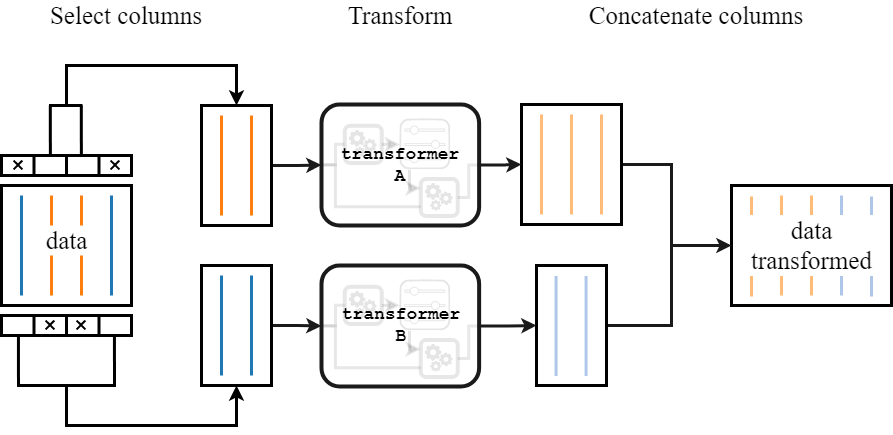
</div>

>El ColumnTransformer es como cualquier otro transformador de scikit-learn. \
En particular, se puede combinar con un clasificador en un Pipeline:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

# Ingeniería de variables (features)

La ingeniería de variables normalmente se define como "la transformación para añadir valor". 

Algunos ejemplos comunes de tareas de ingeniería de variabless son: **features para representar datos categóricos, features para representar texto y features para representar imágenes**. Además, es común crear **features derivadas** para aumentar la complejidad del modelo y la imputación de datos faltantes. A menudo, este proceso se conoce como **vectorización**, ya que implica convertir datos arbitrarios en vectores de buen comportamiento.

Aún no estamos trabajando con algoritmos concretos, así que vamos a verlo más adelante, pero algunos ejemplos podrían ser...

In [ ]:
df["DesviacionHora"] = abs(df["ArrDelay"])

In [ ]:
df["ArrDelay"].mean()

In [ ]:
df["DesviacionHora"].mean()

In [ ]:
df["logAirTime"] = np.log(df["AirTime"])

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df["CRSDepTime"]

In [ ]:
df["Weekends"] = False
df["Weekends"][df.DayOfWeek.isin([6,7])] = True

In [ ]:
df["Weekends"]

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.head(5)

>¿Se nos ocurre alguna variable adicional?

In [ ]:
df.head()

## Variables derivadas
Otro tipo útil de feature es el que se deriva matemáticamente de algunas características de entrada.

In [ ]:
# Por ejemplo, estos datos claramente no se pueden describir bien con una línea recta:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

In [ ]:
# Aún así, podemos ajustar una línea a los datos usando LinearRegression y obtener el resultado óptimo:

from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

In [ ]:
# Está claro que necesitamos un modelo más sofisticado para describir la relación entre x e y.

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

>La matriz de features derivada tiene una columna que representa x, una segunda columna que representa x2 y una tercera columna que representa x3. \
Calcular una regresión lineal en esta entrada ampliada da un ajuste mucho más cercano a nuestros datos:

In [ ]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

## Imputación de datos faltantes
Otra necesidad común en la ingeniería de features es la gestión de datos faltantes.
Al aplicar un modelo típico de ML a dichos datos, primero debemos reemplazar los datos que faltan con algún valor de relleno apropiado.

Para un enfoque de imputación de referencia, utilizando la media, la mediana o el valor más frecuente, Scikit-Learn proporciona la clase Imputer:

In [ ]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2


## Ejercicios

1. Crea algunas variables que puedan resultar de interés para su posterior análisis, por ejemplo: 
    - franja del día (mañana, tarde o noche)
    - trimestres
    - la velocidad
    - ...


2. Transforma los datos de aerolinia (UniqueCarrier) a dummies. Usando ese nuevo objeto, da la proporción de vuelos de American Airlines

3. Sin consultarlo, pon un ejemplo que haga referencia a aprendizaje supervisado y un ejemplo de no supervisado

4. Crea una lista con las edades de tu familia. Ahora rescala estos datos para que sean un porcentaje en relación al más mayor.

5. Crea una lista (o usa una columna de un dataframe) y reescalala para que tenga media 0 y desviación estándard 1. 

    ¿Podrías recuperar los datos originales?

6. Explora el siguiente código, y comenta su uso y utilidad

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

df = df[["ArrDelay","Distance","DepDelay","AirTime"]].dropna()

poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(df)

In [ ]:
pd.DataFrame(X,columns = poly.get_feature_names(df.columns))

In [ ]:
poly = PolynomialFeatures(degree=3, interaction_only=True)
X = poly.fit_transform(df)

In [ ]:
pd.DataFrame(X, columns = poly.get_feature_names(df.columns))

### Nuevo Dataset

Usando los datos de iris (o algunos sencillos de los que dispongas, salaries, datasets de ejemplo, datos propios...) aplica los siguientes procesos:

1. Reescala las columnas numéricas 

2. Convierte a dummies las columnas categóricas

3. Genera algunas variable adicionales. Piensa algunos ejemplos en los que pueda tener algún sentido (no siempre es fácil)

4. Genera interacciones entre variables (tanto numéricas -poly- como categóricas, si se puede), y haz alguna descripción de ellas!

5. Si discretizamos variables numéricas... tienen las nuevas categorías correspondencia con las especies?